In [89]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import json

In [90]:
with open(r"D:\dtc-dr\models\feature-selection\combined_results_23012024.json") as f:
    cv_scores = json.load(f)

target_values = [
    "Stage1.Output.Measurement1.U.Actual",
    "Stage1.Output.Measurement7.U.Actual",
    "Stage1.Output.Measurement11.U.Actual",
    "FirstStage.CombinerOperation.Temperature1.U.Actual",
    "FirstStage.CombinerOperation.Temperature2.U.Actual",
]
cv_scores

{'Stage1.Output.Measurement0.U.Actual': {'regression': [0.05868513426771793,
   -0.004087431845811729,
   [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35]],
  'decision_tree': [1.0, 0.8366491333031765, [10, 19, 21, 22, 25, 27, 33, 34]],
  'mlp': [0.01071281117004741, -0.02332402454231053, [22, 34]]},
 'Stage1.Output.Measurement1.U.Actual': {'regression': [0.7842584834160684,
   0.7513302764551197,
   [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35]],
  'decision_tree': [1.0,
   0.8088659050418163,
   [0, 1, 2, 3, 8, 9, 10, 11, 24, 25, 26, 31,

In [91]:
import math

df = pd.read_csv(
    r"D:\dtc-dr\data-analyse\continuous_factory_process.csv", delimiter=","
)

prefixes_to_match = ["Machine1", "Machine2", "Machine3"]

filtered_columns = [
    col
    for col in df.columns
    if any(col.startswith(prefix) for prefix in prefixes_to_match)
]

param_grid = {
    'max_depth': [10, 20, 30, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

def calculate_best_regression_model():
    results_dict = {}

    for key, value in cv_scores.items():
        if key in target_values:
            indices = value["decision_tree"][2]
            X = []
            for index, value in enumerate(indices):
                X.append(filtered_columns[value])
            X = df[X]   
            y = df[key]
            X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
    )
            mlp = DecisionTreeRegressor()
            grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

            # Fit the model to the training data
            grid_search.fit(X_train, y_train)

            # Get the best hyperparameters
            best_params = grid_search.best_params_
            print(f"Best Hyperparameters for {key}:", best_params)

            # Make predictions on both the training and test sets
            y_train_pred = grid_search.predict(X_train)
            y_test_pred = grid_search.predict(X_test)

            # Calculate R2 score for training and test sets
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)

            # Calculate RMSE for training and test sets
            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

            # Calculate MSE for training and test sets
            mse_train = mean_squared_error(y_train, y_train_pred)
            mse_test = mean_squared_error(y_test, y_test_pred)

            # Create a new dictionary with updated hyperparameter values
            updated_hyperparameters = {
                'max_depth': best_params['max_depth'],
                'min_samples_split': best_params['min_samples_split'],
                'min_samples_leaf': best_params['min_samples_leaf'],
                'max_features': best_params['max_features']
            }

            results_dict[key] = {
                "r2_train": r2_train,
                "r2_test": r2_test,
                "rmse_train": rmse_train,
                "rmse_test": rmse_test,
                "mse_train": mse_train,
                "mse_test": mse_test,
                "indices": indices,
                "best_params": updated_hyperparameters,
            } 
    return results_dict

# Assuming you have a definition for target_values and cv_scores
results = calculate_best_regression_model()

# Save the results to a JSON file
with open('DecisionTree_hyperparametertuning_results.json', 'w') as json_file:
    json.dump(results, json_file, indent=4)

d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
142 fits failed with the following error:
Traceback (most recent call last):
  File "d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\dtc-dr\env\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in val

Best Hyperparameters for Stage1.Output.Measurement1.U.Actual: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\dtc-dr\env\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in val

Best Hyperparameters for Stage1.Output.Measurement7.U.Actual: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}


d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
142 fits failed with the following error:
Traceback (most recent call last):
  File "d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\dtc-dr\env\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in val

Best Hyperparameters for Stage1.Output.Measurement11.U.Actual: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}


d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
134 fits failed with the following error:
Traceback (most recent call last):
  File "d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\dtc-dr\env\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in val

Best Hyperparameters for FirstStage.CombinerOperation.Temperature1.U.Actual: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Hyperparameters for FirstStage.CombinerOperation.Temperature2.U.Actual: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "d:\dtc-dr\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\dtc-dr\env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\dtc-dr\env\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in val

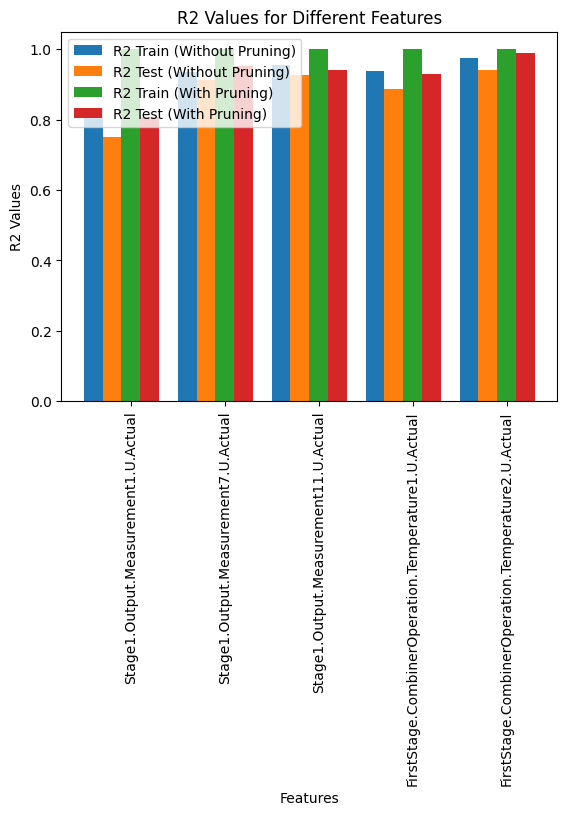

In [110]:


with open(r'D:\dtc-dr\models\feature-selection\combined_results_23012024.json') as json_file:
    data = json.load(json_file)

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'features' list and the R2 values lists
features = list(results.keys())

# Example R2 values (replace these with your actual values)
r2_train_dt_without_pruning = [value["r2_train"] for key, value in results.items()]
r2_test_dt_without_pruning = [value["r2_test"] for key, value in results.items()]

r2_train_dt_with_pruning = [value["decision_tree"][0] for key, value in data.items() if key in features]
r2_test_dt_with_pruning = [value["decision_tree"][1] for key, value in data.items() if key in features]

# Set up positions for the bars
bar_width = 0.2
index = np.arange(len(features))

# Plot the bars
plt.bar(index - 1.5 * bar_width, r2_train_dt_without_pruning, width=bar_width, label='R2 Train (Without Pruning)')
plt.bar(index - 0.5 * bar_width, r2_test_dt_without_pruning, width=bar_width, label='R2 Test (Without Pruning)')
plt.bar(index + 0.5 * bar_width, r2_train_dt_with_pruning, width=bar_width, label='R2 Train (With Pruning)')
plt.bar(index + 1.5 * bar_width, r2_test_dt_with_pruning, width=bar_width, label='R2 Test (With Pruning)')

# Add labels, title, and legend
plt.xlabel('Features')
plt.ylabel('R2 Values')
plt.title('R2 Values for Different Features')
plt.xticks(index + bar_width / 2, features, rotation=90)  # Set rotation angle to 0 for horizontal labels
plt.legend()

# Show the plot
plt.show()


